## Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from nltk import word_tokenize

## Loading datasets

In [2]:
df = pd.read_csv('datasets/tmdb_5000_movies.csv')
df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [3]:
df.shape

(4803, 20)

## Choosing columns best for recommendation

In [4]:
x = df.iloc[0]
x

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

**Here, I'm choosing genres, keywords, production_companies and tagline.**

## Preparing the TFIDF vector

In [5]:
x['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [6]:
gen = json.loads(x['genres'])
gen

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [7]:
' '.join(''.join(n['name'].split()) for n in gen)

'Action Adventure Fantasy ScienceFiction'

In [8]:
tag = word_tokenize(x['tagline'])
' '.join(tag)

'Enter the World of Pandora .'

In [9]:
def tokens_generator(row):
    out = ''
    
    genres = json.loads(row['genres'])
    genres = ' '.join(''.join(n['name'].split()) for n in genres)
    out += genres
    
    keywords = json.loads(row['keywords'])
    keywords = ' '.join(''.join(n['name'].split()) for n in keywords)
    out += keywords

    production_companies = json.loads(row['production_companies'])
    production_companies = ' '.join(''.join(n['name'].split()) for n in production_companies)
    out += production_companies

    tag = word_tokenize(x['tagline'])
    tag = ' '.join(tag)
    out += tag

    return out

In [10]:
tokens_generator(df.iloc[0])

'Action Adventure Fantasy ScienceFictioncultureclash future spacewar spacecolony society spacetravel futuristic romance space alien tribe alienplanet cgi marine soldier battle loveaffair antiwar powerrelations mindandsoul 3dIngeniousFilmPartners TwentiethCenturyFoxFilmCorporation DuneEntertainment LightstormEntertainmentEnter the World of Pandora .'

In [11]:
df['string'] = df.apply(tokens_generator, axis=1)

In [12]:
df['string']

0       Action Adventure Fantasy ScienceFictionculture...
1       Adventure Fantasy Actionocean drugabuse exotic...
2       Action Adventure Crimespy basedonnovel secreta...
3       Action Crime Drama Thrillerdccomics crimefight...
4       Action Adventure ScienceFictionbasedonnovel ma...
                              ...                        
4798    Action Crime Thrillerunitedstates–mexicobarrie...
4799           Comedy RomanceEnter the World of Pandora .
4800    Comedy Drama Romance TVMoviedate loveatfirstsi...
4801                         Enter the World of Pandora .
4802    Documentaryobsession camcorder crush dreamgirl...
Name: string, Length: 4803, dtype: object

In [13]:
tfidf = TfidfVectorizer(max_features=5000)

X = tfidf.fit_transform(df['string'])

In [14]:
X = X.toarray()

In [15]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
X.shape

(4803, 5000)

## Mapping movie title to index

In [17]:
title = df['title']
title

0                                         Avatar
1       Pirates of the Caribbean: At World's End
2                                        Spectre
3                          The Dark Knight Rises
4                                    John Carter
                          ...                   
4798                                 El Mariachi
4799                                   Newlyweds
4800                   Signed, Sealed, Delivered
4801                            Shanghai Calling
4802                           My Date with Drew
Name: title, Length: 4803, dtype: object

In [18]:
movieidx = pd.Series(df.index, index = df['title'])

In [19]:
movieidx

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In [20]:
id = movieidx['Home']
id

184

In [21]:
query = X[id]
query

array([0., 0., 0., ..., 0., 0., 0.])

In [22]:
query = query.reshape((1,-1))
query

array([[0., 0., 0., ..., 0., 0., 0.]])

## Computing cosine similarity

In [23]:
scores = cosine_similarity(query, X)
scores

array([[0.16260326, 0.03660605, 0.01667528, ..., 0.0405036 , 0.06361003,
        0.02437223]])

In [24]:
scores = scores.flatten()

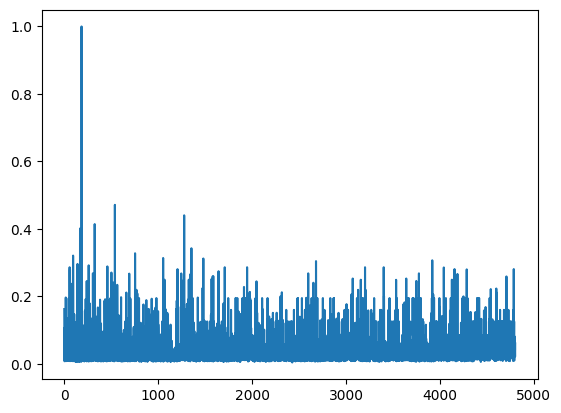

In [25]:
plt.plot(scores);

In [26]:
(-scores).argsort()

array([ 184,  539, 1277, ...,  139, 1133, 2428], dtype=int64)

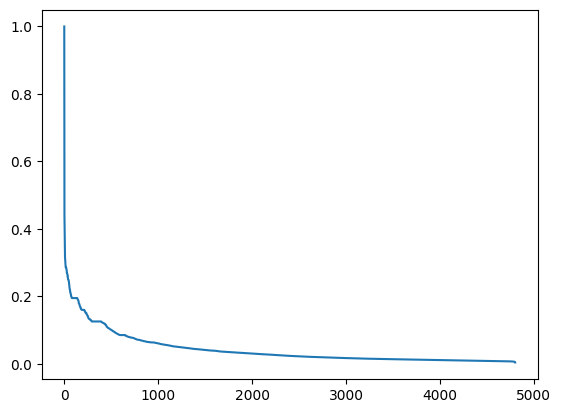

In [27]:
plt.plot(scores[(-scores).argsort()]);

In [28]:
recommended_id = (-scores).argsort()[1:6]
recommended_id

array([ 539, 1277,  324,  168, 1354], dtype=int64)

In [29]:
df['title'].iloc[recommended_id]

539                            Titan A.E.
1277                                Delgo
324                 The Road to El Dorado
168     Final Fantasy: The Spirits Within
1354                         Space Chimps
Name: title, dtype: object

## Function to generates recommendations

In [30]:
def recommend(title):
    # get the row in the dataframe for this movie
    try:
        idx = movieidx[title]
    except:
        return "Movie not found on the database!!! Please try other movies."
        
    # calculate the pairwise similarities for this movie
    query = X[idx]
    query = query.reshape((1,-1))
    scores = cosine_similarity(query, X)
    
    # currently the array is 1 x N, make it just a 1-D array
    scores = scores.flatten()
    
    # get the indexes of the highest scoring movies
    # get the first 5 recommendations
    # don't return itself!
    recommended_idx = (-scores).argsort()[1:6]
    
    # return the titles of the recommendations
    return df['title'].iloc[recommended_idx]

## Testing the recommendations

In [31]:
recommend('Mortal Kombat')

1611    Mortal Kombat: Annihilation
1670             DOA: Dead or Alive
3613             Digimon: The Movie
2237              Alone in the Dark
1398                      Max Payne
Name: title, dtype: object

In [32]:
recommend('Home')

539                            Titan A.E.
1277                                Delgo
324                 The Road to El Dorado
168     Final Fantasy: The Spirits Within
1354                         Space Chimps
Name: title, dtype: object

In [33]:
recommend('Final Destination')

1839       Final Destination 3
701                Cats & Dogs
817           American Wedding
4516    Kingdom of the Spiders
2230                   Willard
Name: title, dtype: object

In [34]:
recommend('Dark Knight')

'Movie not found on the database!!! Please try other movies.'